# 연구과제(12-4)_Diamonds_다중선형회귀분석

본 과제는 Kaggle의 `Diamonds` 데이터셋을 활용하여 데이터 전처리부터 탐색적 데이터 분석, 통계적 추론, 회귀분석까지 데이터 분석의 전체 흐름을 경험하는 것을 목표로 하는 평가 과제 입니다.

아래 미션들은 “정답을 맞히는 과제”가 아니라, 데이터를 통해 하나의 이야기를 만들어 가는 탐구 과제입니다.

각 미션은 서로 독립적이지만, 모두 합치면 하나의 질문으로 수렴합니다.

>“다이아몬드 가격은 왜 이렇게 결정되는 걸까?”

이 과제의 목적은 “회귀식 = 숫자”가 아니라 “회귀식 = 설명 가능한 세계관” 이라는 인식을 심어주는 데 목적이 있습니다.

※ 본 과제는 팀/개인 단위 모두 수행 가능합니다.

## 미션 1. 데이터 신뢰도 (전처리 과정)

In [ ]:
origin = load_data('Diamonds')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab12_/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------------------------------------
price    price in US dollars ($326 ~ $18,823)
carat    weight of the diamond (0.2~5.01)
cut      quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color    diamond colour, from J (worst) to D (best)
clarity  a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        length in mm (0~10.74)
y        width in mm (0--58.9)
z        depth in mm (0--31.8)
depth    total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    width of top of diamond relative to widest point (43--95)


===== 데이터 크기 확인 =====
데이터셋 크기: (53940, 10)
열 갯수: 10
행 갯수: 53940

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


- 구조점검
  - 행렬: (53940, 10)
- 정리(품질 해결)
  - 결측치 없다. 
  - **이상치 존재여부 파악 필요**
- 정리/병합 필요여부:
  - 명목형을 카테고리로?
- 재구조화 필요여부: x

In [ ]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 이상치, 결측치 정제

#### 1. 수치형 변수 정제처리

In [ ]:
df = origin.copy()

df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

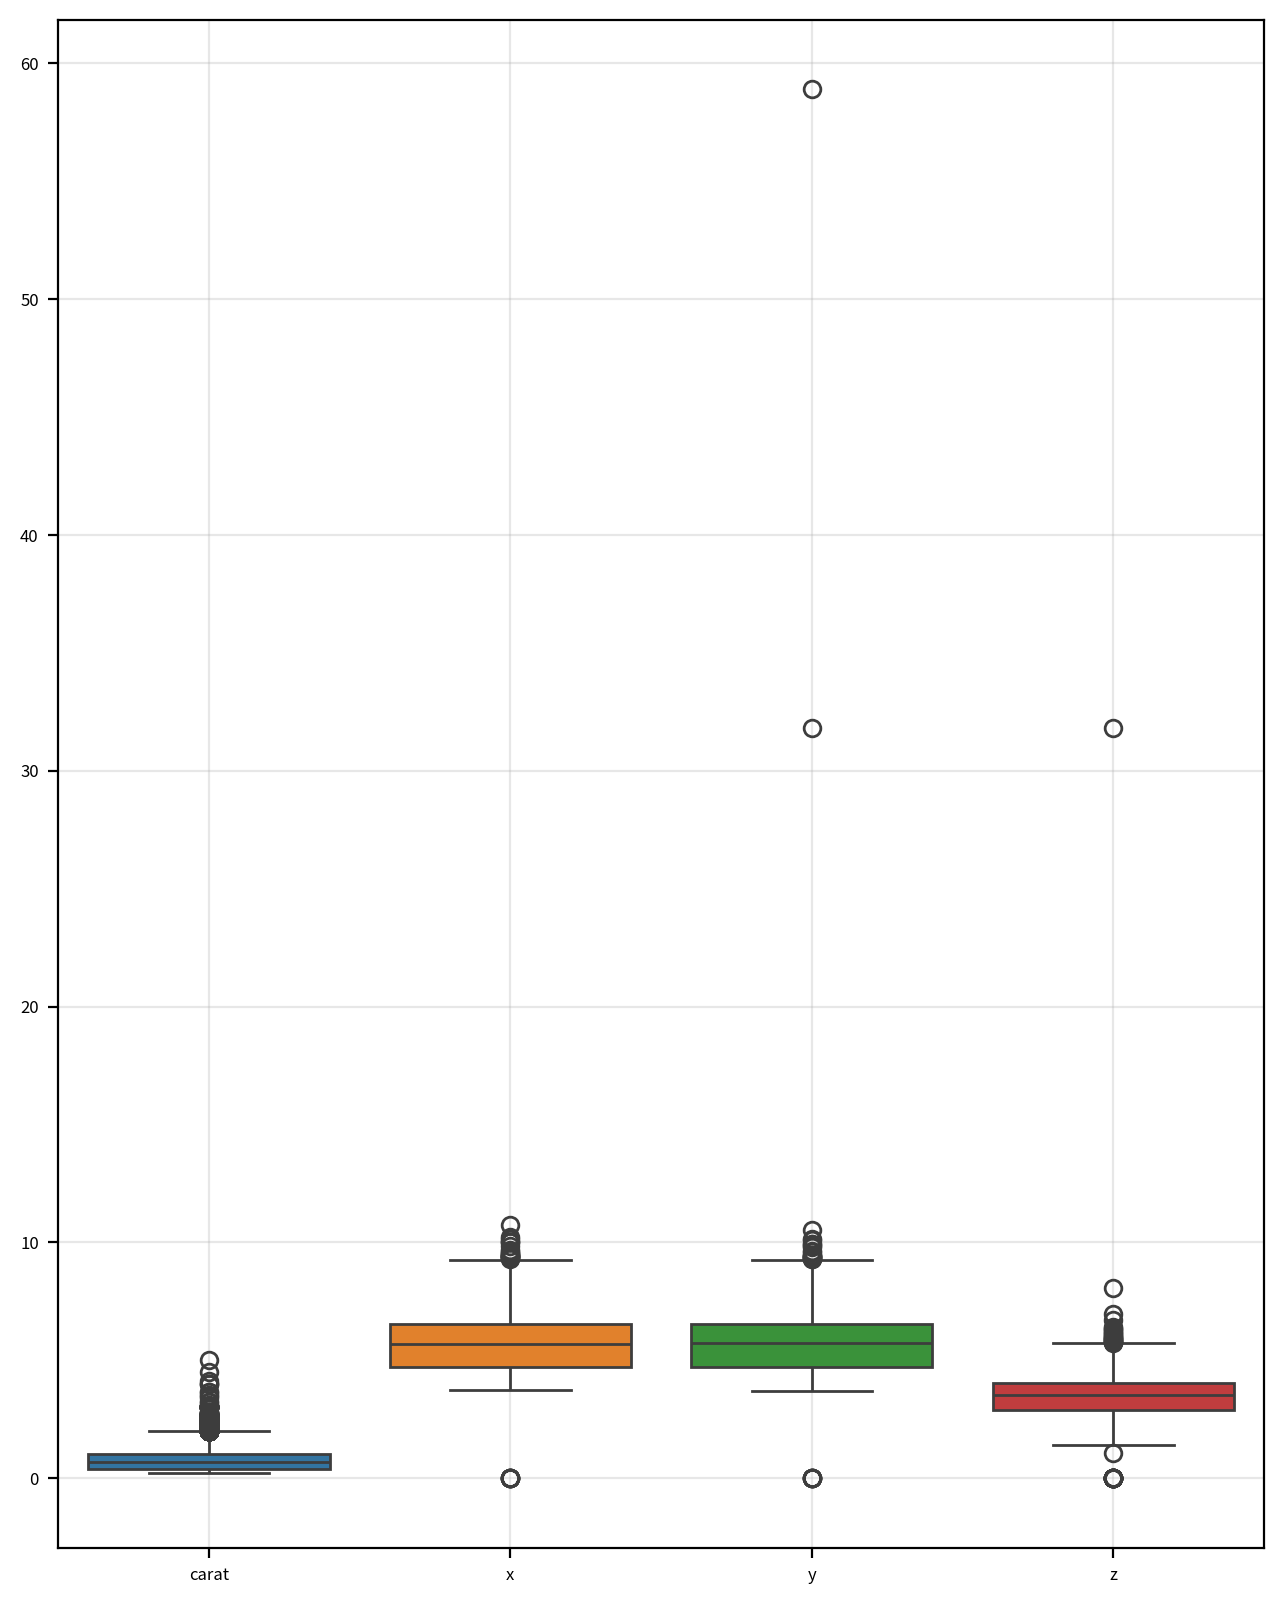

In [ ]:
not_int = origin[['price', 'cut', 'color', 'clarity', 'depth', 'table']]
df7 = origin.drop(not_int, axis=1)
#df

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 1600             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df7)

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

> 값 0 인건 결측치 역할일거고, 
> 이 값들이랑 이상치 처리를 어떻게 해야하는지 고민쓰
>
> 1. price는 carat, cut, color, clarity에 영향 받음
> 2. carat과 x*y*z의 관련 기준 파악 필요
>    - 단위(mm³, mm)로 연결되어있기 때문
> 3. x,y,z 이상치 지우면 안되(0 포함)

In [ ]:
df = origin.copy()

df['vol'] = df['x'] * df['y'] * df['z']
df

,price,carat,cut,color,clarity,x,y,z,depth,table,vol
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,38.202030
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,34.505856
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,38.076885
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,46.724580
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,5.75,5.76,3.50,60.8,57.0,115.920000
53936,2757,0.72,Good,D,SI1,5.69,5.75,3.61,63.1,55.0,118.110175
53937,2757,0.70,Very Good,D,SI1,5.66,5.68,3.56,62.8,60.0,114.449728
53938,2757,0.86,Premium,H,SI2,6.15,6.12,3.74,61.0,58.0,140.766120


In [ ]:
df.describe()

,price,carat,x,y,z,depth,table,vol
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,5.731157,5.734526,3.538734,61.749405,57.457184,129.849403
std,3989.439738,0.474011,1.121761,1.142135,0.705699,1.432621,2.234491,78.245262
min,326.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000
25%,950.000000,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,65.136830
50%,2401.000000,0.700000,5.700000,5.710000,3.530000,61.800000,57.000000,114.808572
75%,5324.250000,1.040000,6.540000,6.540000,4.040000,62.500000,59.000000,170.842451
max,18823.000000,5.010000,10.740000,58.900000,31.800000,79.000000,95.000000,3840.598060


In [ ]:
zero_len = df.query("vol == 0")
zero_len

,price,carat,cut,color,clarity,x,y,z,depth,table,vol
2207,3142,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,0.0
2314,3167,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,0.0
4791,3696,1.10,Premium,G,SI2,6.50,6.47,0.0,63.0,59.0,0.0
5471,3837,1.01,Premium,F,SI2,6.50,6.47,0.0,59.2,58.0,0.0
10167,4731,1.50,Good,G,I1,7.15,7.04,0.0,64.0,61.0,0.0
11182,4954,1.07,Ideal,F,SI2,0.00,6.62,0.0,61.6,56.0,0.0
11963,5139,1.00,Very Good,H,VS2,0.00,0.00,0.0,63.3,53.0,0.0
13601,5564,1.15,Ideal,G,VS2,6.88,6.83,0.0,59.2,56.0,0.0
15951,6381,1.14,Fair,G,VS1,0.00,0.00,0.0,57.5,67.0,0.0
24394,12631,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,0.0


> 부피(vol)가 0인 데이터들도 가격이랑 carat 값도 다 있네?! 
>
> 이유를 모르겠으니 수치형 독립변수 개별로 종속변수와의 상관관계를 rough 하게 산점도 그래프로 한번 봐 보자:

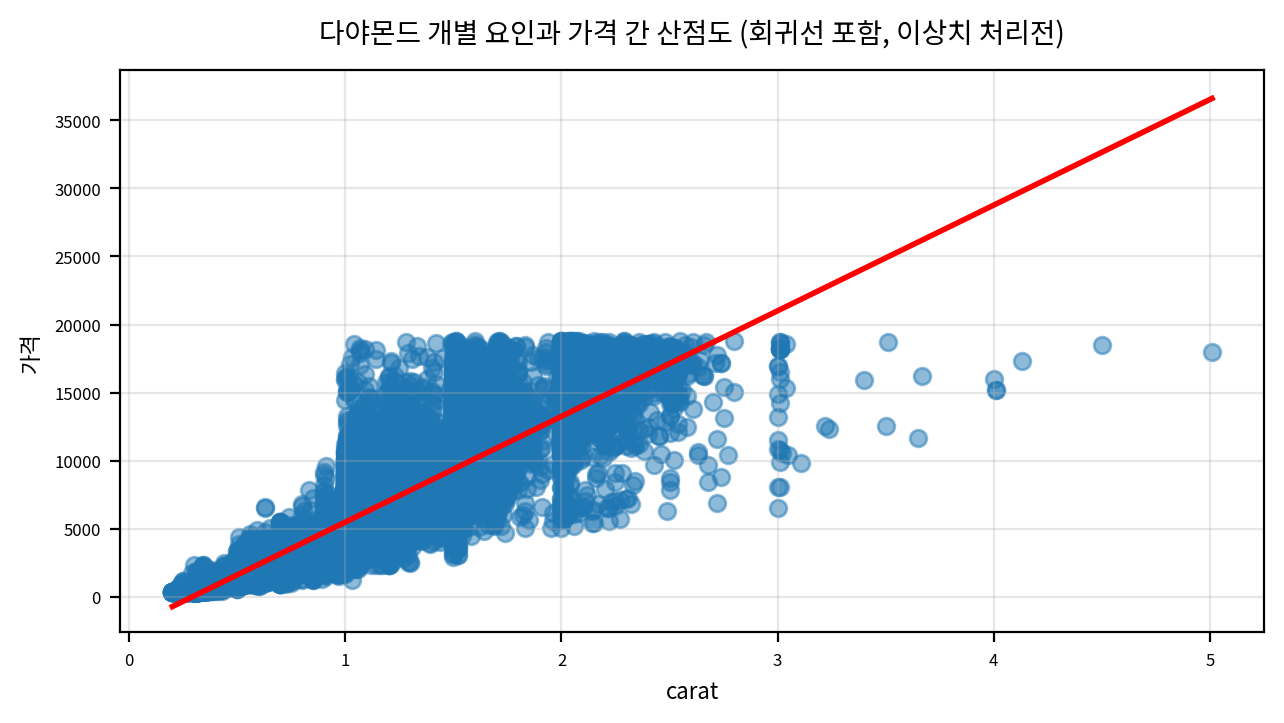

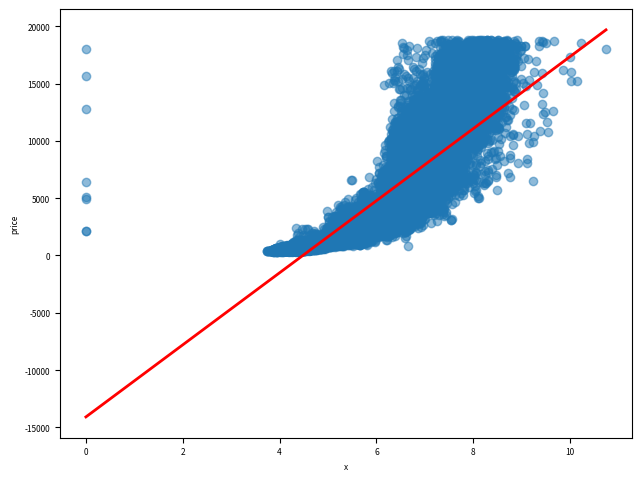

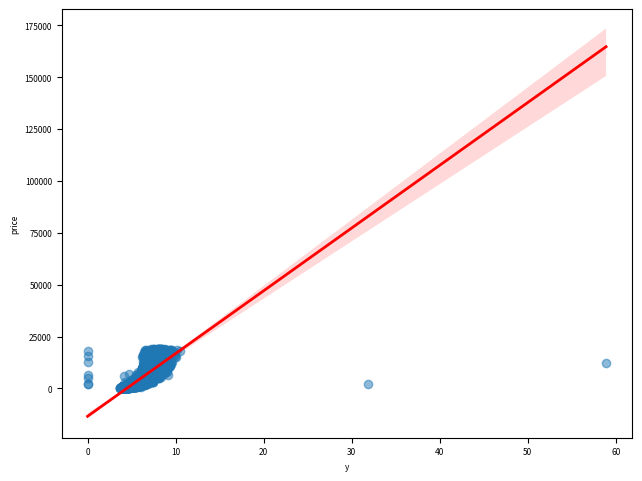

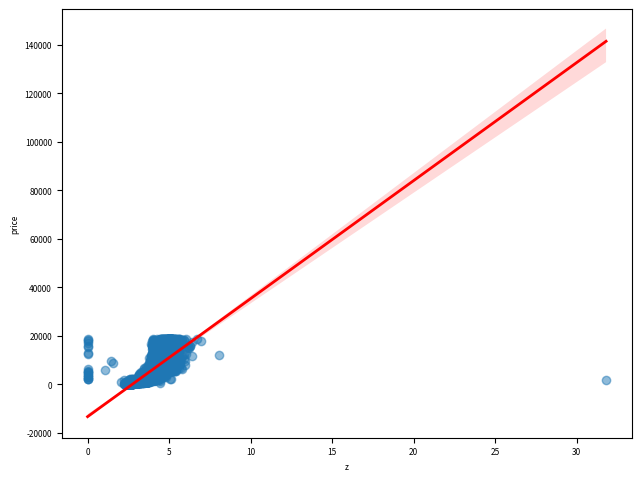

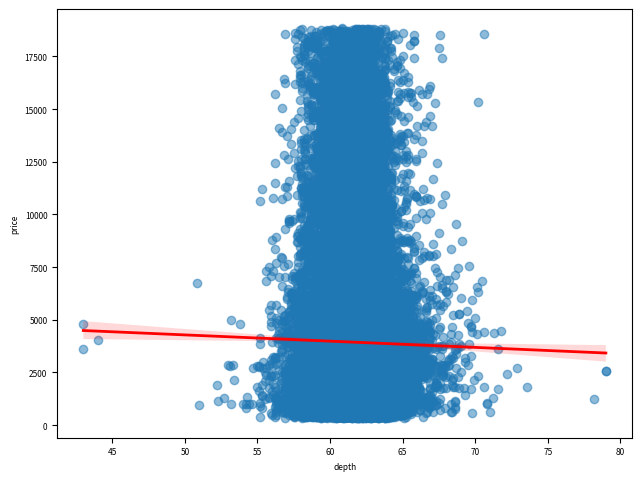

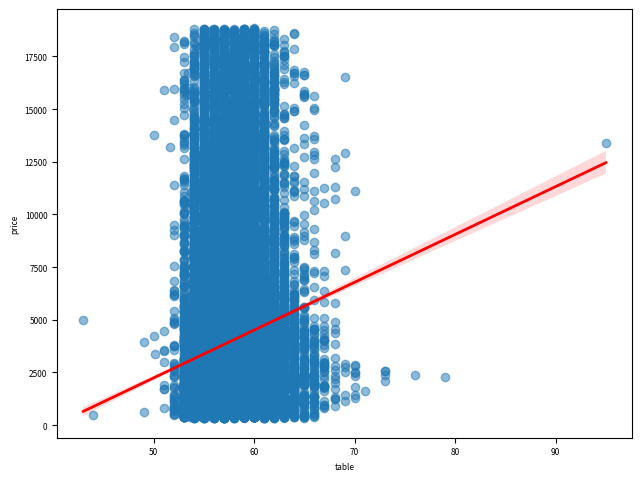

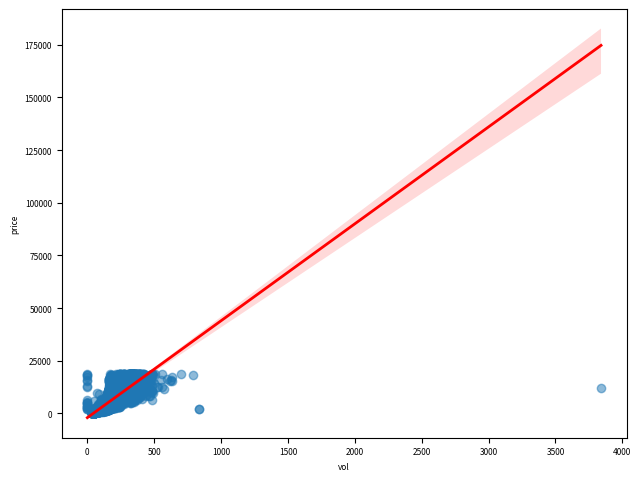

In [ ]:
num = ['carat', 'x', 'y', 'z', 'depth', 'table', 'vol']

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 산점도 그래프(Reg Plot) 그리기 (회귀선 포함)
    # regplot()은 hue 파라미터를 지원 안한다 ㅠ
for i in num:
    sb.regplot(data = df, x = i, y = 'price',
            scatter_kws = {'alpha': 0.5},
            line_kws={'color': 'red', 'linewidth': 2})

    # 3) 그래프 꾸미기: 
    ax.set_title('다야몬드 개별 요인과 가격 간 산점도 (회귀선 포함, 이상치 처리전)', fontsize=10, pad=10)
    ax.set_xlabel(i, fontsize=8)
    ax.set_ylabel('가격', fontsize=8)
    ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

    # 4) 출력
    plt.tight_layout()           # 여백 제거
    plt.show()                   # 그래프 화면 출력
    plt.close()                  # 그래프 작업 종료

> - table이랑 depth의 영향은 price에 무관하겠네
> - 산점도 그래프 모양이 기둥형태여서 (일단 디테일 조사는 들어가겠지만.. 의심+1 추가)

> - vol(부피)값은 내가 계산한 값인데
>   - vol은 이상치 처리 전 데이터의 x,y,z값의 곱인거고
>   - 이상치 처리 전 값의 곱들은 더 큰 이상치를 생성하기 마련
>   - 따라서 vol에 대한 price 그래프 범위가 저따구로 나온거 같음 ---- (1)
> 
> - price의 사분위 수 구간 대비해서 변수 y랑 z는 이상치 처리 해도 될듯 ---- (2)
>   - but 삭제처리는 price 요인에 영향 있으니까 삭제 말고 극단치 상한/하한으로 대체하는게 좋겠다
  
> -> 데이터 정제 결론: 
> - 모든 수치형 변수들의 '≤ outline_min', 'outline_max ≤' 값들은 다 q1, q3로 몰자!

In [ ]:
#df.describe()
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 데이터 전처리: df3

In [ ]:
not_xnum = ['cut', 'color', 'clarity']
df3 = df.drop(not_xnum, axis=1)
# df3

for line in df3.columns:
    q1 = df3[line].quantile(0.25)
    q3 = df3[line].quantile(0.75)
    iqr = q3 - q1
    outline_min = q1 - iqr * 1.5
    outline_max = q3 + iqr * 1.5

    print(f"{line} 하한 극단치 경계:", outline_min)
    print(f"{line} 상한 극단치 경계:", outline_max)

    df3.loc[df[line] < outline_min, line] = outline_min
    df3.loc[df[line] > outline_max, line] = outline_max

price 하한 극단치 경계: -5611.375
price 상한 극단치 경계: 11885.625
carat 하한 극단치 경계: -0.5599999999999999
carat 상한 극단치 경계: 2.0
x 하한 극단치 경계: 1.9649999999999999
x 상한 극단치 경계: 9.285
y 하한 극단치 경계: 1.9899999999999993
y 상한 극단치 경계: 9.27
z 하한 극단치 경계: 1.2150000000000003
z 상한 극단치 경계: 5.734999999999999
depth 하한 극단치 경계: 58.75
depth 상한 극단치 경계: 64.75
table 하한 극단치 경계: 51.5
table 상한 극단치 경계: 63.5
vol 하한 극단치 경계: -93.42160075000001
vol 상한 극단치 경계: 329.40088125


C:\Users\itwill\AppData\Local\Temp\ipykernel_13484\3914063229.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5611.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[df[line] < outline_min, line] = outline_min


각 수치형 데이터들의 정규성/등분산성 검사:

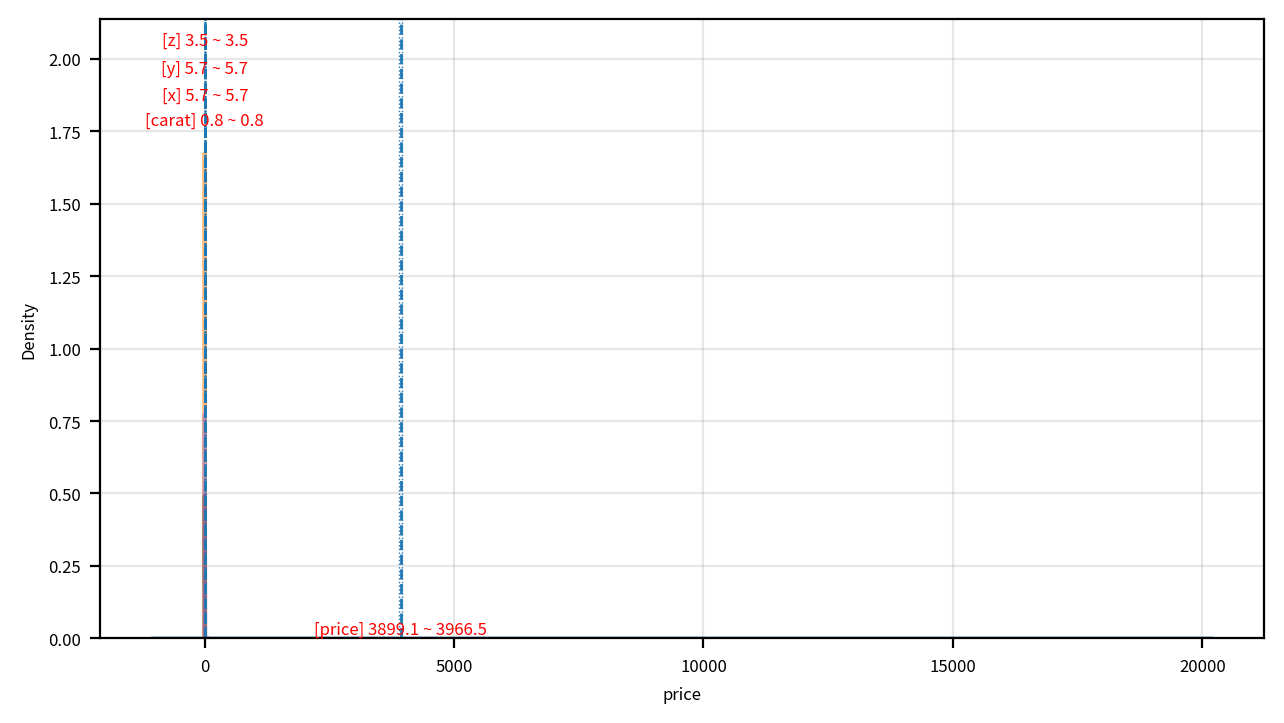

,statistic,p-value,result
fields,,,
price,15096.649760,0.0,False
carat,8926.737828,0.0,False
x,3120.253700,0.0,False
y,40315.993147,0.0,False
z,28986.640114,0.0,False
Levene's,40955.271421,0.0,False


In [ ]:
df7 = df[['price', 'carat', 'x', 'y', 'z']]
# ↑ depth, table, vol까지 한번에 다 보니까 그래프 구간이 안맞음
# -> 그래서 구간 겹치는 네 변수 우선 보는거

# -----------------------------------
# 데이터 분포 시각화
# -----------------------------------
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in df7.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=df7, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = df7[c].max()                        # 최대값
    dof = len(df7[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = df7[c].mean()                   # 표본평균
    sp_std = df7[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(df7[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

# -----------------------------------
# 데이터의 정규성/등분산성 확인
# -----------------------------------
equal_var_fields = []
normal_dist = True
report = []

for c in df7.columns:
    s, p = normaltest(df7[c])

    normalize = p > 0.05
    report.append({
        "fields": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize

# 변수가 두개 이상일 때 확인해야될 등분산성:
if len(df7.columns) > 1:
    # 정규성 충족할 때 등분산성 검정방법:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*df7.values.T) # 모든 컬럼의 데이터 한번에
    # 정규성 충족 못할 때 등분산성 검정법:
    else:
        n = "Levene's"
        s, p = levene(*df7.values.T, center='median')
        # : 정규성 충족 못할 땐 '기본값인 평균'으로 계산하면 안됨
    
    report.append({
        "fields": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('fields')
report_df

> price 그래프 범위가 확 다르네.. 그럼 우선 price 제외하고 그래프 시각화 ㄱㄱ

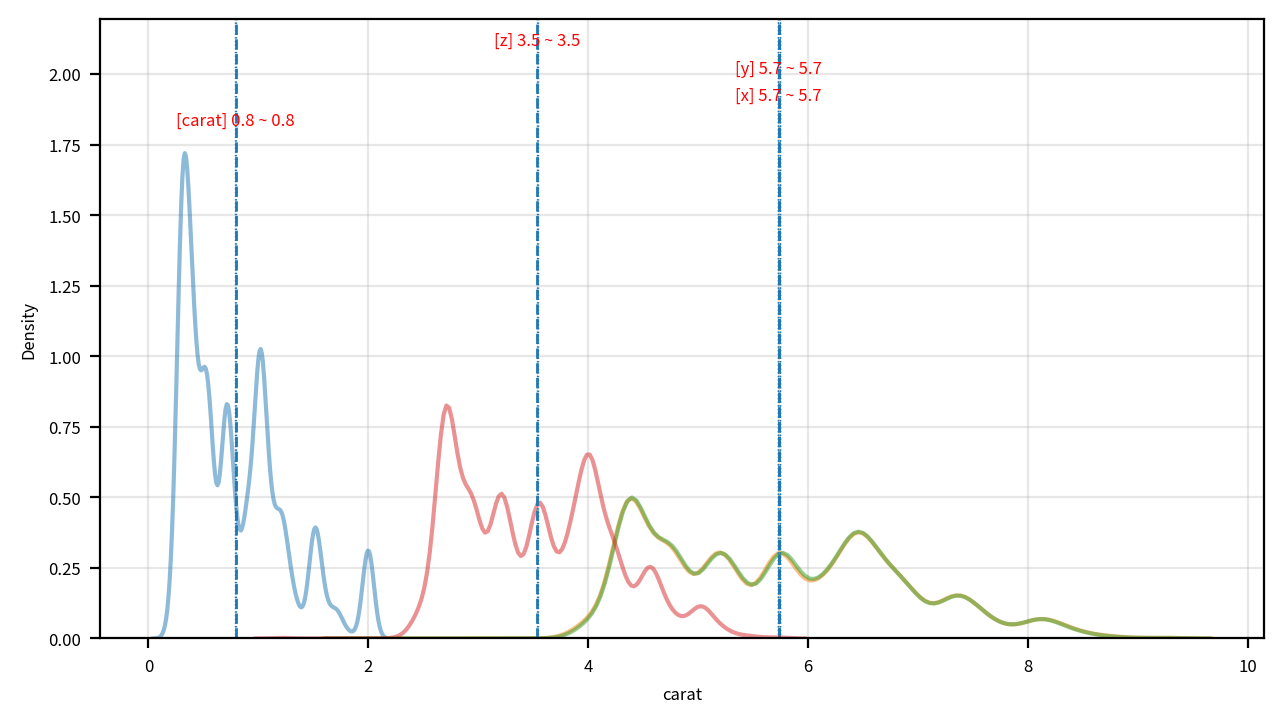

In [ ]:
df7 = df3[['carat', 'x', 'y', 'z']]

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in df7.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=df7, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = df7[c].max()                        # 최대값
    dof = len(df7[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = df7[c].mean()                   # 표본평균
    sp_std = df7[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(df7[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 변수 4개 보는 와중인데 그래프는 3개만 나오길래.. x,y 간에 얼마나 겹치는지 가시화 해봐야겠다

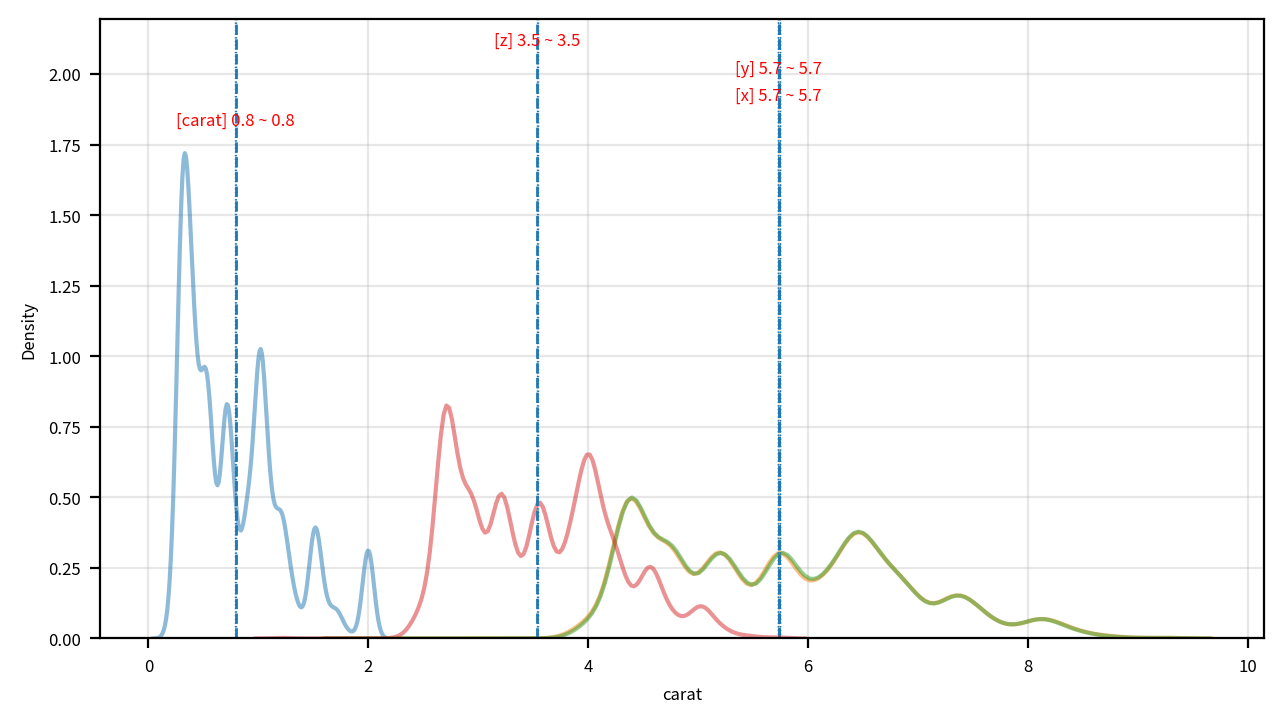

In [ ]:
df6 = df7[['x', 'y']]

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in df7.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=df7, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = df7[c].max()                        # 최대값
    dof = len(df7[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = df7[c].mean()                   # 표본평균
    sp_std = df7[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(df7[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

In [ ]:
df7 = df6[['price']]

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in df7.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=df7, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = df7[c].max()                        # 최대값
    dof = len(df7[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = df7[c].mean()                   # 표본평균
    sp_std = df7[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(df7[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"

### 명목형 변수 정보확인: 범주 갯수, 데이터 몰빵 여부:

In [ ]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
for c in ['cut', 'color', 'clarity']:
    print("====", c, "====")
    print(df[c].value_counts())

==== cut ====
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
==== color ====
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
==== clarity ====
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


> 이정도면,, 고르게 분포한다 보면 에반가

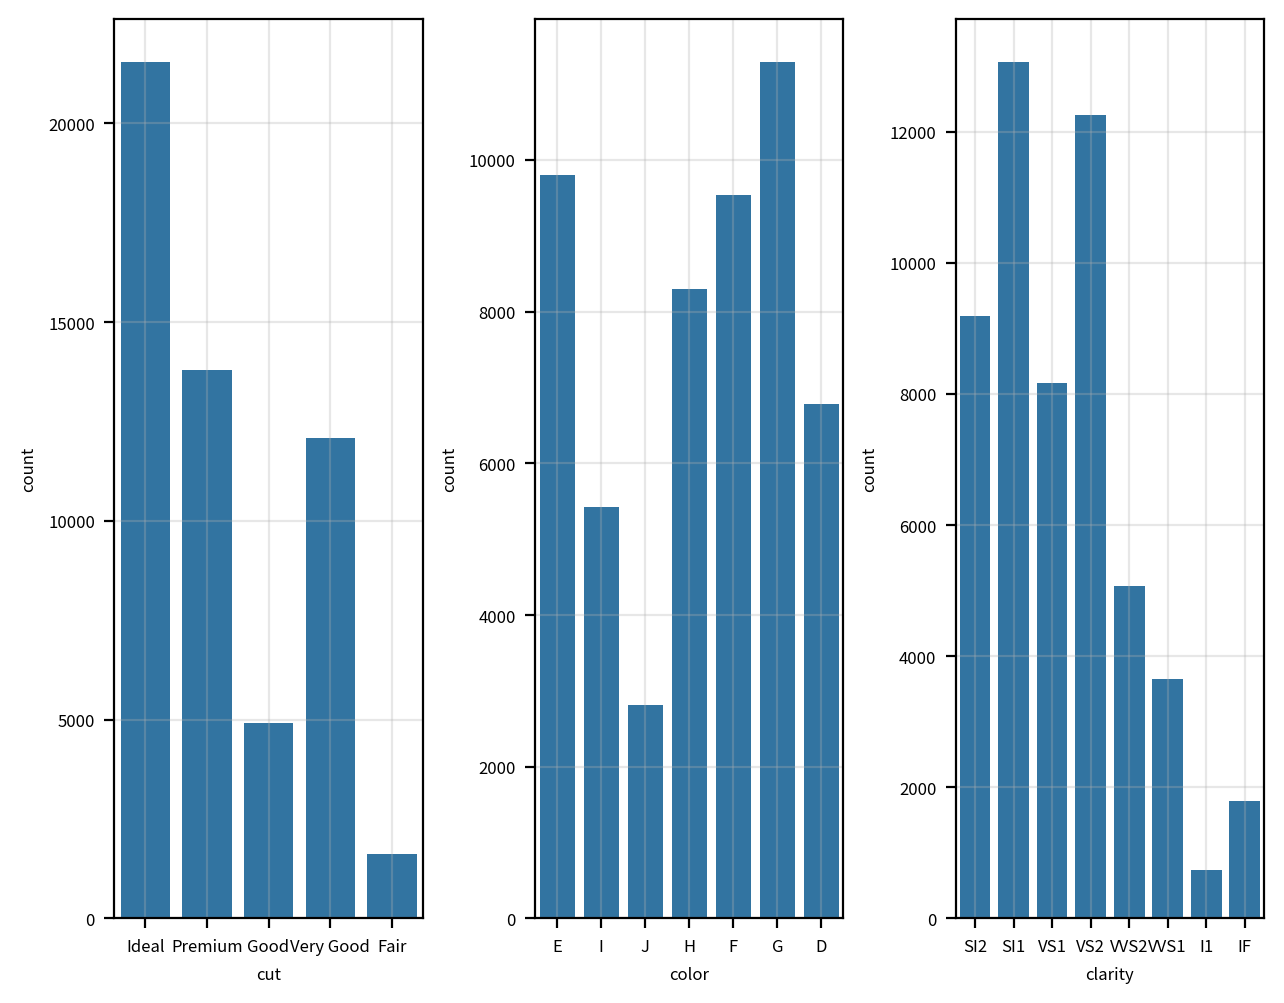

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 1000             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 3                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) count plot 그래프 그리기
for i, v in enumerate(df[['cut', 'color', 'clarity']]):
    sb.countplot(
        data = df, 
        x = v, 
        ax = ax[i]
        )
    ax[i].grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 아닌가,, 근데 cut 변수의 ideal 범주 몰빵은 좋은거 아닐까..

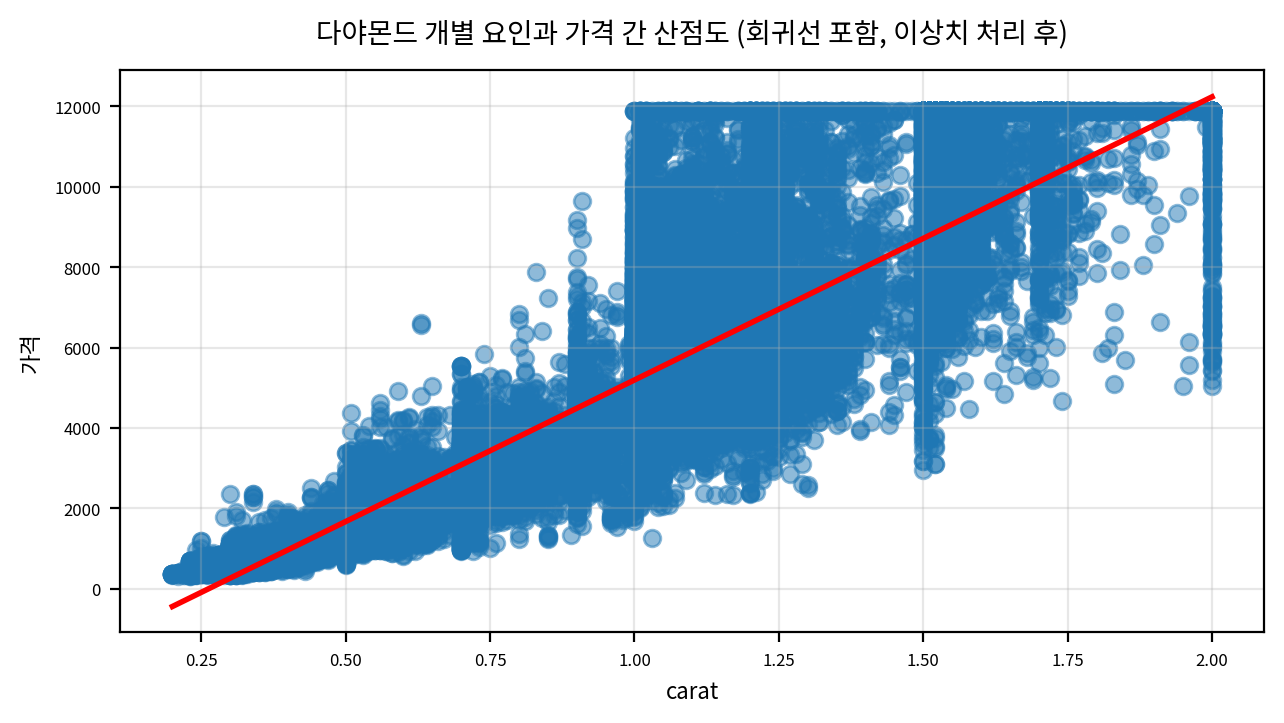

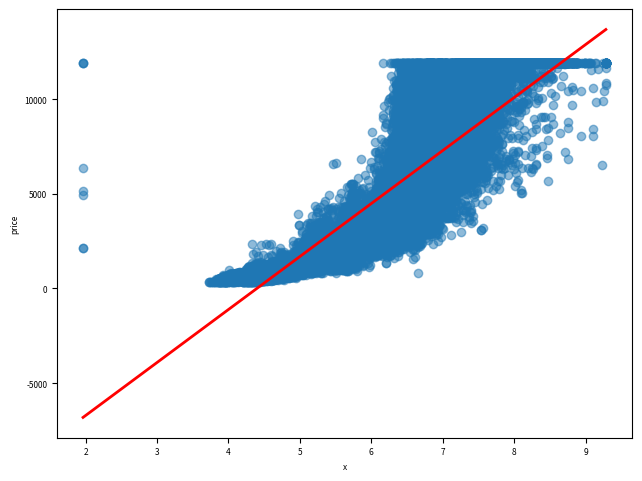

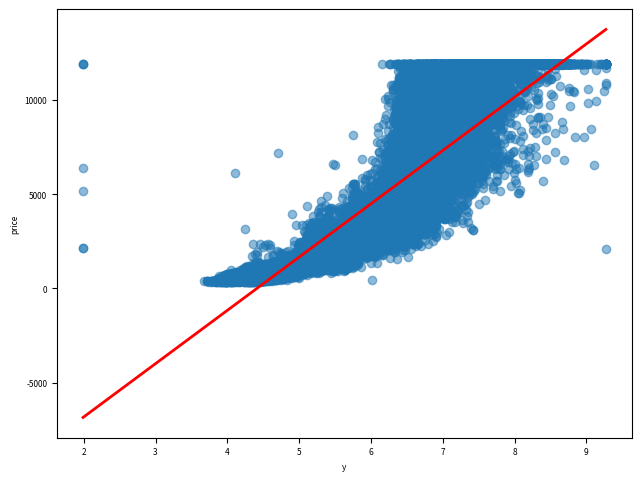

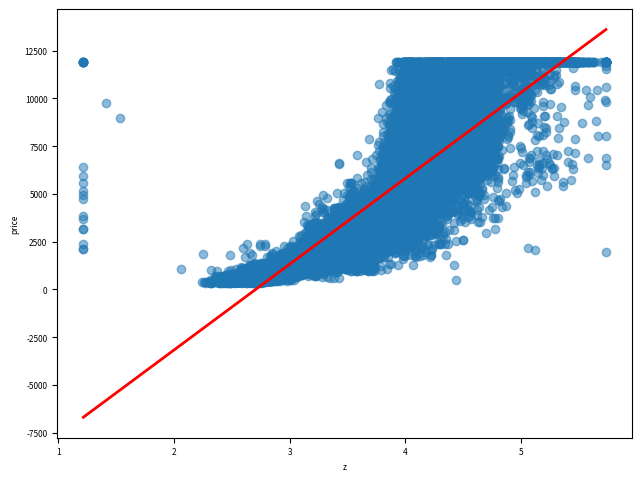

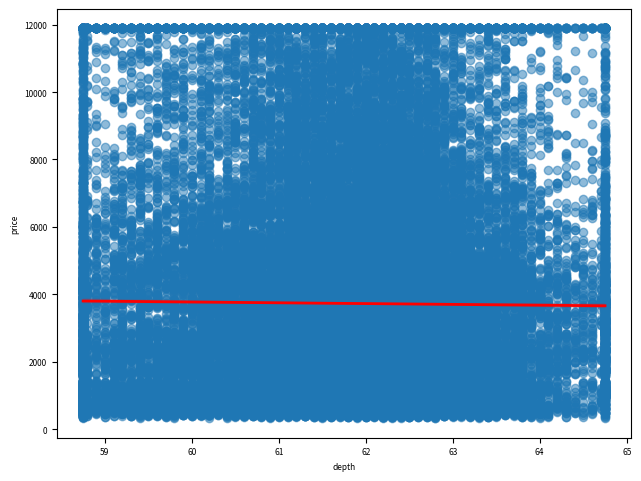

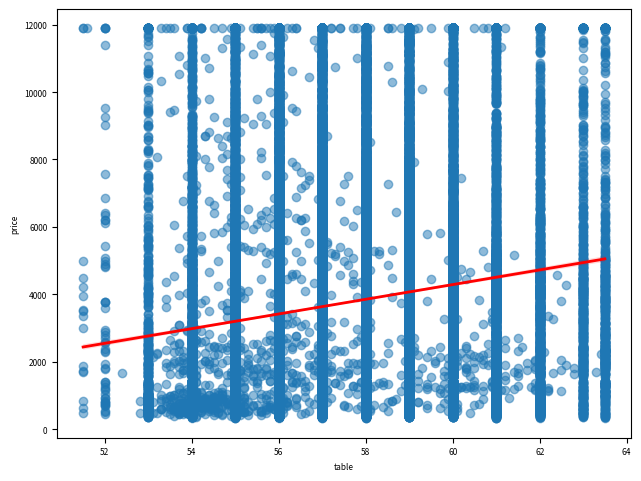

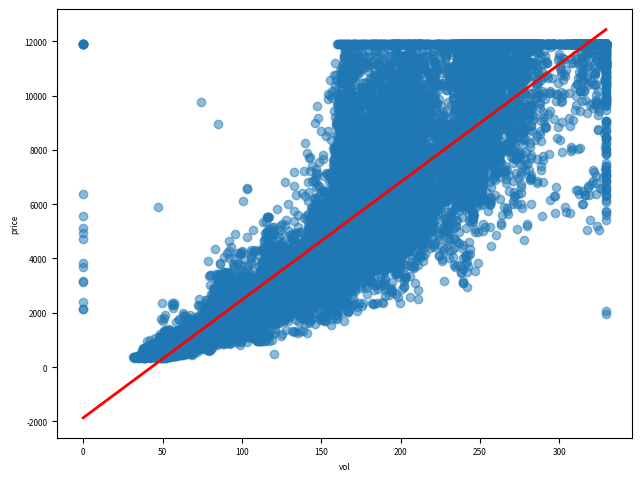

In [ ]:
num = ['carat', 'x', 'y', 'z', 'depth', 'table', 'vol']

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 산점도 그래프(Reg Plot) 그리기 (회귀선 포함)
    # regplot()은 hue 파라미터를 지원 안한다 ㅠ
for i in num:
    sb.regplot(data = df3, x = i, y = 'price',
            scatter_kws = {'alpha': 0.5},
            line_kws={'color': 'red', 'linewidth': 2})

    # 3) 그래프 꾸미기: 
    ax.set_title('다야몬드 개별 요인과 가격 간 산점도 (회귀선 포함, 이상치 처리 후)', fontsize=10, pad=10)
    ax.set_xlabel(i, fontsize=8)
    ax.set_ylabel('가격', fontsize=8)
    ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

    # 4) 출력
    plt.tight_layout()           # 여백 제거
    plt.show()                   # 그래프 화면 출력
    plt.close()                  # 그래프 작업 종료

In [ ]:
df3

,price,carat,x,y,z,depth,table,vol
0,326.0,0.23,3.95,3.98,2.43,61.50,55.0,38.202030
1,326.0,0.21,3.89,3.84,2.31,59.80,61.0,34.505856
2,327.0,0.23,4.05,4.07,2.31,58.75,63.5,38.076885
3,334.0,0.29,4.20,4.23,2.63,62.40,58.0,46.724580
4,335.0,0.31,4.34,4.35,2.75,63.30,58.0,51.917250
...,...,...,...,...,...,...,...,...
53935,2757.0,0.72,5.75,5.76,3.50,60.80,57.0,115.920000
53936,2757.0,0.72,5.69,5.75,3.61,63.10,55.0,118.110175
53937,2757.0,0.70,5.66,5.68,3.56,62.80,60.0,114.449728
53938,2757.0,0.86,6.15,6.12,3.74,61.00,58.0,140.766120


근거 1. table이랑 depth의 영향은 price에 무관
> - 산점도 그래프 모양이 기둥형태여서 

근거 2. vol(부피)값은 내가 계산한 값
>   - vol은 이상치 처리 전 데이터의 x,y,z값의 곱

데이터 정제: 
- 모든 수치형 변수들의 '≤ outline_min', 'outline_max ≤' 값들은 다 q1, q3 안으로 몰기

## 미션2. '가격 데이터의 형태 파악'

> 그래프 개형으로 알 수 있는 사실:
> 1. 변수 x, y, z, carat, 끼리는 유사한 그래프 개형을 공유한다
>   - carat은 다야몬드 무게, 즉 질량(단위: info에 안써져있지만 mg으로 추정)이고
>   - 다이아몬드 부피(vol)는 변수 x,y,z의 곱인데 (단위: mm³)
>       - 알려진 사실1: 밀도 = 질량(mg) / 부피 (mm³) 공식과
>       - 알려진 사실2: 다이아몬드의 밀도값(3.51~52 mg/mm³)으로 인해
>       - carat의 데이터 개형은 여러 환산 과정으로 인하여 변수 x,y,z의 영향을 받는건 어느 정도 당연한 얘기이다.
>       - 그러나 여기서 중요한 부분은, x, y, z 데이터들 끼리 개형유사성을 띈다는 점으로 (왜 유사성을 띄는지 이유는 밝혀내야겠지만) carat의 개형을 본인들의 개형에서 peak intensity만 증폭시킨 같은 개형으로 만들었다는 점이다. 
> 
> 2. price 개형은 위에 나열한 변수 4개랑은 조금 다름을 볼 수 있는데
>   - 이는 price에 미치는 요인들이 위에 나열한 수치형 변수 이외에도 존재함을 시사한다.
>
> 3. 앞전에 본 depth-price, table-price의 산점도에서는 price에 상관 없이 depth와 table 값이 특정 구간에 기둥처럼 몰빵되어있는 형태를 관찰할 수 있었는데
>   - 이는 depth와 table에 영향을 주는 변수 x, y, z의 그래프 모양 유사성으로도 설명되는 부분이다.
>       - depth = 2z/(x+y), table = 다이아몬드 상단까지 높이 / 가장 넓은 너비

## 미션 3. '로그변환은 왜 등장할까?'

`price`와 `carat`에 로그 변환을 적용해 보고, 변환 전과 후의 분포를 나란히 비교해 보자.

로그 변환을 하면 무엇이 달라졌는지, 그리고 왜 많은 분석에서 로그 변환을 사용하는지 이번 데이터셋을 기준으로 설명해 보자.

이때 중요한 것은 “로그를 썼다”가 아니라 `“왜 써야 했는가”`이다. 


### 1. `price` 종속변수와 `carat` 독립변수 각각의 데이터분포 확인/정규성/등분산성 검사하기:

#### `price`랑 `carat` 변수의 데이터 분포도 확인:

> aim: check 고르게 or 특정 구간에 몰빵

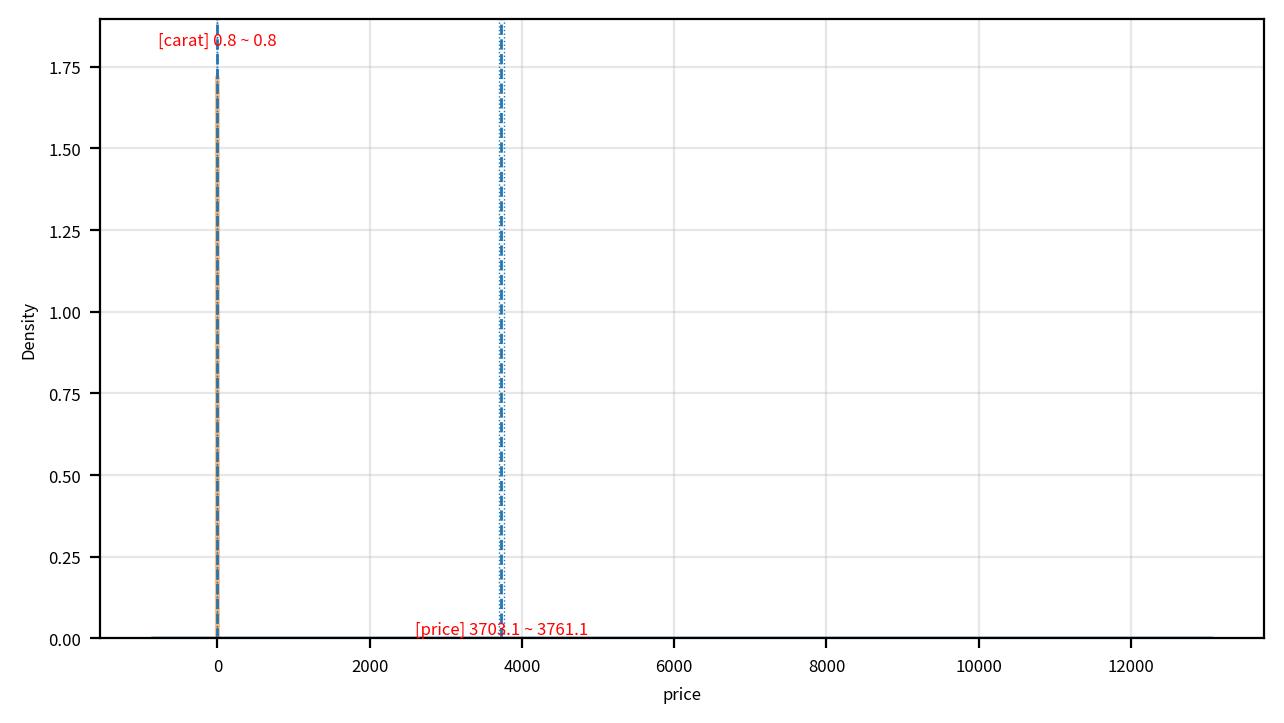

In [ ]:
xname = 'carat'
yname = 'price'

df8 = df3[[yname, xname]]

# 1) 그래프 초기화 
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for c in df8.columns:
    # 2) KDE plot 그리기:
    sb.kdeplot(data=df8, x=c, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = df8[c].max()                        # 최대값
    dof = len(df8[c]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = df8[c].mean()                   # 표본평균
    sp_std = df8[c].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(df8[c])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 6, "color": "red"})

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

peak가 나오는 범위가 다르므로 두 변수의 로그변환 필요 여부 확인 ㄱㄱ

to check necessity of Log Tranform in `price` for range-scaling


====== 이상치 확인 ======
이상치 존재 -> correlation coefficient: Spearman


,original_skew,log_skew,outliers(|z| > 3),log_recommended
price,1.148304,-0.334923,0,True
carat,0.899893,0.605868,0,False


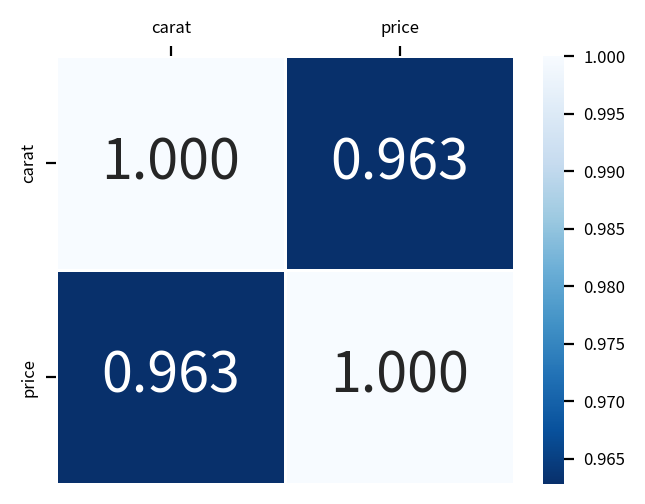

본 분석에서는 carat과 price간 상관관계를 검토하였다.

데이터 점검 과정에서 비선형 관계 가능성 또는 이상치 영향이 확인되어 스피어만 상관계수를 사용하였다.

분석 결과, 스피어만 상관계수는 r = 0.963, p = 0.000(으)로 나타나 두 변수 간 양의 단조 관계가 존재함을 확인하였다.


In [ ]:
xname = 'carat'
yname = 'price'

# ------------------------------------
# 선형성 가정 확인:
# ------------------------------------
# 1. 선형성: 산점도 그래프 시각화로 이미 확인함.
#linearity_ok = True
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
reset = linear_reset(model, power=2, use_f=True)
linearity_ok = reset.pvalue > 0.05

# ------------------------------------
# 2. 이상치와 왜도:

df8 = df3[['price', 'carat']]
results = {}

for col in df8.columns:
    temp = df8[col].dropna()

    # 왜도 계산:
    skew_original = temp.skew()

    # Z-score 기반 이상치 탐지 (|z| > 3):
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    # 로그변환 후 왜도 계산 (음수 대비 +1):
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    # 로그변환 여부 판단
    need_log = (abs(skew_original) > 1) and (abs(skew_log) < abs(skew_original))

    results[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z| > 3)': outlier_count,
        'log_recommended': need_log
    }

results_df = DataFrame(results).T

# 이상치 점검 결과:
outlier_flag = len(results_df['outliers(|z| > 3)'] > 0) > 0

print("\n====== 이상치 확인 ======")
print(f"{'이상치 존재 -> correlation coefficient: Spearman' if outlier_flag else '이상치 존재 X -> correlation coefficient: Pearson'}")
display(results_df)
# ------------------------------------
# 상관분석 수행
# ------------------------------------
report = f"본 분석에서는 {xname}과 {yname}간 상관관계를 검토하였다.\n\n"

# 상관계수 선택:
if linearity_ok and not outlier_flag:
    chosen = 'pearson'
    corr, pval = pearsonr(df8[xname], df8[yname])

    if pval > 0.05:
        report += "데이터 점검 결과, 두 변수의 관계는 통계적으로 유의하지 않았다."
    else:
        report += f"데이터 점검 결과, 두 변수의 관계는 선형적이며 이상치의 영향도 크지 않아 피어슨 상관계수를 사용하였다.\n\n분석 결과, 피어슨 상관계수는 r = {corr:0.3f}, p = {pval:0.3f}(으)로 나타나 두 변수 간 {"양의 상관" if corr > 0 else "음의 상관"} 관계가 함을 확인하였다."

else:
    chosen = 'spearman'
    corr, pval = spearmanr(df8[xname], df8[yname])

    if pval > 0.05:
        report += "데이터 점검 결과, 두 변수의 관계는 통계적으로 유의하지 않았다."
    else:
        report += f"데이터 점검 과정에서 비선형 관계 가능성 또는 이상치 영향이 확인되어 스피어만 상관계수를 사용하였다.\n\n분석 결과, 스피어만 상관계수는 r = {corr:0.3f}, p = {pval:0.3f}(으)로 나타나 두 변수 간 {"양의 단조" if corr > 0 else "음의 단조"} 관계가 존재함을 확인하였다."
    
# ------------------------------------
# 결과 시각화
# ------------------------------------
corr_matrix = df8[[xname, yname]].corr(method=chosen)

# 1) 그래프 초기화
width_px = 650              # 그래프 가로크기
height_px = 500             # 그래프 세로크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Heatmap 그리기
sb.heatmap(data = corr_matrix, annot=True, fmt='0.3f', 
           linewidth = 0.5, cmap = "Blues_r", 
           annot_kws = {'size': 20})
  # camp: 칼라맵 종류: 'Greys', 'Purples', 'Blues', 'Greens', 
  # 'Oranges', 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 
  # 'RdPu', 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 
  # 'BuGn', 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 
  # 'RdBu', 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 
  # 'bwr', 'seismic' / 'berlin', 'managua', 'vanimo'

# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()        # x축 변수 이름을 상단으로 이동

# 4) 출력
plt.tight_layout()         # 여백 제거
plt.show()                 # 그래프 화면 출력
plt.close()                # 그래프 작업 종료

# ------------------------------------
# 결과 보고 출력
# ------------------------------------
print(report)

- 왜도 분석 결과 `price` 종속변수는 로그변환 필요 여부가 확인 되었고 `carat`은 로그 변환 없이 분석 진행해도 됨이 확인됨
- 두 변수의 공통점:
- 차이점:
- 회귀분석 진행 여부: 상관계수 = 0.963으로 1에 겁나 가깝게 나왔으니 회귀분석 진행해도 됨.